# Frequently Asked Questions

This notebook contains some code for the videos with some of the FAQs about Pandas and Seaborn. There's not a lot of explanation in Markdown here... please watch the videos to understand what is being done in each step.

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

## Gathering data

Loading the data that will be used in the demonstrations.



In [2]:
tweets = pd.read_pickle('JoostdeVries_export.pkl')

In [3]:
retweets = pd.read_pickle('JoostdeVries_retweets.pkl')

## Filtering or slicing a dataframe

In [4]:
tweets.columns

Index(['id', 'created_at', 'from_user_name', 'from_user_id', 'from_user_lang',
       'from_user_tweetcount', 'from_user_followercount',
       'from_user_friendcount', 'from_user_listed', 'from_user_realname',
       'from_user_utcoffset', 'from_user_timezone', 'from_user_description',
       'from_user_url', 'from_user_verified', 'from_user_profile_image_url',
       'from_user_created_at', 'from_user_withheld_scope',
       'from_user_favourites_count', 'source', 'location', 'geo_lat',
       'geo_lng', 'text', 'retweet_id', 'retweet_count', 'favorite_count',
       'to_user_id', 'to_user_name', 'in_reply_to_status_id', 'filter_level',
       'lang', 'possibly_sensitive', 'quoted_status_id', 'withheld_copyright',
       'withheld_scope'],
      dtype='object')

In [5]:
tweets['lang'].value_counts()

en     292122
in      20930
fr       3099
und      2672
es       2010
th       1911
pt        478
ja        321
sv        302
nl        277
tl        258
ro        167
de        138
lv        137
ar        104
ca         99
it         95
et         92
fi         75
da         72
tr         46
zh         43
hi         41
cs         36
ht         28
cy         26
bn         22
no         14
hu         13
pl         11
ko         10
ta          9
ru          7
is          7
iw          4
lt          3
te          2
vi          1
uk          1
sl          1
ur          1
ne          1
el          1
Name: lang, dtype: int64

In [6]:
tweets_en = tweets[tweets['lang']=='en']

In [7]:
len(tweets_en)

292122

In [8]:
tweets[tweets['lang']=='en']['from_user_name'].value_counts()

andrewmorrisuk     1939
MEEKSVS            1687
julias_friends     1581
AutismGazette       726
LotusOak            663
Autism_Father       266
aspiesmom           255
Aculaser_Clinic     249
smittiezach1        242
omasoncharles       204
NeuroRebel          178
emmalucythomson     170
TannersDad          169
ItsATinkThing       154
ShivendraKSinh1     152
schoolrunshop       151
AutismlandPenny     141
The_Autism_Dad      140
AnnaKennedy1        137
AutismStyle         135
RunnymedeRevo       133
Autism_TT           132
Noonesp24486604     132
and_kell            131
HollyBMoses         130
AutismEmployme1     129
andnextcomesl       129
awesomelyautis1     127
dailypostafrica     127
BBSmiami            121
                   ... 
Inspiredlawyer        1
namismagic            1
ExoThinker            1
TiffaniElaine11       1
TaintedDoveCos        1
nohedosnt             1
FuckMan_Shit          1
engzow                1
RubyMohans            1
haleyadean            1
DaphTy          

In [9]:
tweets[tweets['lang'] != 'en']['from_user_name'].value_counts()

andrewmorrisuk     207
AnthonySc6         103
MaddDawgDailey      97
AnnaKennedy1        47
Societybytesr       46
julias_friends      45
AskDrCovington      45
MEEKSVS             43
HAMEL_91            35
JustCaroLa          32
bot55773449         30
yorkiepuddings      29
DesignsBySiri       25
W_Angels_Wings      24
RahmatPsych         21
Egorafr             20
jmb063              19
AutismGazette       18
Kbelles_Eden        18
official_pendek     18
sslimerick          17
Tamipsi             17
barfypants          16
khalilpsych         16
rahah_ghazali       16
cuteazcanBe         16
EntraideM           16
jerukmasa           15
PartTimeca          15
qtpblog             15
                  ... 
Snowbility           1
mukhlis10_98         1
ryasyh               1
GudrunTiberg         1
_nrhnni              1
AniqBlake            1
Senpaipotatoo        1
Azzafzira            1
hyoraxx              1
Thebellaa_           1
CiaraASullivan       1
sc6ri                1
amirahfatih

In [10]:
tweets[(tweets['lang']!='en') & (tweets['lang']!='fr') & (tweets['location'] != 'Malaysia')]['location'].value_counts()

Selangor, Malaysia                                        462
Johore, Malaysia                                          226
Johor Bahru, Johor                                        205
Kuala Lumpur                                              201
Bedford                                                   199
Kedah, Malaysia                                           187
Perak, Malaysia                                           171
London, England                                           132
MY                                                        130
ประเทศไทย                                                 125
Florida, USA                                              111
Boston, MA                                                103
Naast t Huis voor #Klokkenluiders in #BeerputNederland    103
Kuantan, Pahang                                           102
United Kingdom                                             92
Malacca, Malaysia                                          90
malaysia

## Handling missing values

In [11]:
tweets.head()

,id,created_at,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,...,favorite_count,to_user_id,to_user_name,in_reply_to_status_id,filter_level,lang,possibly_sensitive,quoted_status_id,withheld_copyright,withheld_scope
0,1039462605264498689,2018-09-11 10:36:12,vgbio123,1000842576549773312,fr,969,29,91,0,VGBIO,...,0,NaN,None,NaN,low,fr,0.0,NaN,None,None
1,1039462678199189504,2018-09-11 10:36:29,KelseyABCTeach,1037277619543306241,en,1,2,12,0,Kelsey Munro - ABC Teachers,...,0,NaN,None,NaN,low,en,NaN,NaN,None,None
2,1039462759505829888,2018-09-11 10:36:48,Dagim_Gemechu,4855390810,en,1621,101,204,1,Dagim,...,0,136958068.0,iamnavamohan,1.039397e+18,low,en,NaN,NaN,None,None
3,1039462859980374016,2018-09-11 10:37:12,MonseurM,477202320,fr,22190,274,942,3,Monseur Myriam,...,0,NaN,None,NaN,low,fr,0.0,NaN,None,None
4,1039462899050274816,2018-09-11 10:37:22,StephenGuerraMN,19753525,en,22122,599,952,53,Stephen Guerra,...,0,NaN,None,NaN,low,en,0.0,NaN,None,None


In [12]:
tweets.isna().sum()

id                                  0
created_at                          0
from_user_name                      0
from_user_id                        0
from_user_lang                      0
from_user_tweetcount                0
from_user_followercount             0
from_user_friendcount               0
from_user_listed                    0
from_user_realname                  0
from_user_utcoffset            325687
from_user_timezone             325687
from_user_description           39679
from_user_url                  206662
from_user_verified                  0
from_user_profile_image_url         0
from_user_created_at                0
from_user_withheld_scope       325687
from_user_favourites_count          0
source                              0
location                        91486
geo_lat                        325349
geo_lng                        325349
text                                0
retweet_id                      79994
retweet_count                       0
favorite_cou

In [13]:
tweets_no_missing = tweets.dropna()

In [14]:
len(tweets)

325687

In [15]:
len(tweets_no_missing)

0

In [16]:
tweets_no_missing_location = tweets.dropna(subset=['location'])

In [17]:
len(tweets_no_missing_location)

234201

In [18]:
tweets['location'].value_counts()

United States                     3906
Malaysia                          3120
Florida, USA                      2778
London, England                   2456
Toronto, Ontario                  2215
United Kingdom                    2191
Bedford                           2151
London                            1856
UK                                1749
England, United Kingdom           1468
California, USA                   1390
Canada                            1248
Texas, USA                        1176
Los Angeles, CA                   1047
USA                                937
New York, NY                       847
New York, USA                      755
Wales, UK                          755
Houston, TX                        709
Chicago, IL                        701
Australia                          676
NoVA, USA                          665
Selangor, Malaysia                 604
France                             569
Washington, DC                     497
Scotland, United Kingdom 

In [19]:
tweets['location_nomissing'] = tweets['location'].fillna('not provided')

In [20]:
tweets['location_nomissing'].value_counts()

not provided                      91486
United States                      3906
Malaysia                           3120
Florida, USA                       2778
London, England                    2456
Toronto, Ontario                   2215
United Kingdom                     2191
Bedford                            2151
London                             1856
UK                                 1749
England, United Kingdom            1468
California, USA                    1390
Canada                             1248
Texas, USA                         1176
Los Angeles, CA                    1047
USA                                 937
New York, NY                        847
New York, USA                       755
Wales, UK                           755
Houston, TX                         709
Chicago, IL                         701
Australia                           676
NoVA, USA                           665
Selangor, Malaysia                  604
France                              569


## Merging and appending dataframes

In [21]:
tweets.head()

,id,created_at,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,...,to_user_id,to_user_name,in_reply_to_status_id,filter_level,lang,possibly_sensitive,quoted_status_id,withheld_copyright,withheld_scope,location_nomissing
0,1039462605264498689,2018-09-11 10:36:12,vgbio123,1000842576549773312,fr,969,29,91,0,VGBIO,...,NaN,None,NaN,low,fr,0.0,NaN,None,None,not provided
1,1039462678199189504,2018-09-11 10:36:29,KelseyABCTeach,1037277619543306241,en,1,2,12,0,Kelsey Munro - ABC Teachers,...,NaN,None,NaN,low,en,NaN,NaN,None,None,"Lichfield, England"
2,1039462759505829888,2018-09-11 10:36:48,Dagim_Gemechu,4855390810,en,1621,101,204,1,Dagim,...,136958068.0,iamnavamohan,1.039397e+18,low,en,NaN,NaN,None,None,"Centreville, VA"
3,1039462859980374016,2018-09-11 10:37:12,MonseurM,477202320,fr,22190,274,942,3,Monseur Myriam,...,NaN,None,NaN,low,fr,0.0,NaN,None,None,"Esneux, Belgique"
4,1039462899050274816,2018-09-11 10:37:22,StephenGuerraMN,19753525,en,22122,599,952,53,Stephen Guerra,...,NaN,None,NaN,low,en,0.0,NaN,None,None,rochester mn


In [22]:
retweets.head()

,retweet_id,retweets_total
1,1000059223609298945,2
2,1000355246827343872,6
3,1000356573519269889,2
4,1000387360717201410,1
5,1000397037261729792,1


In [23]:
retweets.dtypes

retweet_id        object
retweets_total     int64
dtype: object

In [24]:
tweets.dtypes

id                                     object
created_at                     datetime64[ns]
from_user_name                         object
from_user_id                            int64
from_user_lang                         object
from_user_tweetcount                    int64
from_user_followercount                 int64
from_user_friendcount                   int64
from_user_listed                        int64
from_user_realname                     object
from_user_utcoffset                    object
from_user_timezone                     object
from_user_description                  object
from_user_url                          object
from_user_verified                      int64
from_user_profile_image_url            object
from_user_created_at           datetime64[ns]
from_user_withheld_scope               object
from_user_favourites_count              int64
source                                 object
location                               object
geo_lat                           

In [25]:
retweets = retweets.rename(columns={'retweet_id': 'id'})

In [26]:
retweets.head()

,id,retweets_total
1,1000059223609298945,2
2,1000355246827343872,6
3,1000356573519269889,2
4,1000387360717201410,1
5,1000397037261729792,1


In [27]:
len(tweets)

325687

In [28]:
len(retweets)

22502

In [29]:
len(tweets.merge(retweets, on='id'))

17367

In [30]:
tweets_in_both = tweets.merge(retweets, on='id')

In [31]:
len(tweets.merge(retweets, on='id', how='left'))

325687

In [32]:
tweets_left = tweets.merge(retweets, on='id', how='left')

In [33]:
len(tweets.merge(retweets, on='id', how='right'))

22502

In [34]:
tweets_right = tweets.merge(retweets, on='id', how='right')

In [35]:
tweets_in_both.head()

,id,created_at,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,...,to_user_name,in_reply_to_status_id,filter_level,lang,possibly_sensitive,quoted_status_id,withheld_copyright,withheld_scope,location_nomissing,retweets_total
0,1039462949017010179,2018-09-11 10:37:33,rsetfoundation,725701469270364168,en,128,51,204,0,Rset Foundation,...,None,NaN,low,en,NaN,NaN,None,None,"Abuja, Nigeria",1
1,1039464023736168448,2018-09-11 10:41:50,fahad_almadhi,393469537,en,657,75,65,2,Fahadaam,...,None,NaN,low,und,NaN,1.039450e+18,None,None,"Riyadh, Kingdom of Saudi Arabia",1
2,1039464093281923073,2018-09-11 10:42:06,networkautism,618952024,en,14585,12766,1009,179,Network Autism,...,None,NaN,low,en,0.0,NaN,None,None,London,4
3,1039464105093017600,2018-09-11 10:42:09,HealthWatch123,2670271687,en,22619,1814,897,106,Health Watch,...,None,NaN,low,en,0.0,NaN,None,None,not provided,3
4,1039464377135583233,2018-09-11 10:43:14,sunnyuchan,988172281934381057,en,6495,480,347,6,rach ♡'s jae,...,None,NaN,low,en,NaN,NaN,None,None,loving day6 & a.c.e,1


In [36]:
tweets_left.head()

,id,created_at,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,...,to_user_name,in_reply_to_status_id,filter_level,lang,possibly_sensitive,quoted_status_id,withheld_copyright,withheld_scope,location_nomissing,retweets_total
0,1039462605264498689,2018-09-11 10:36:12,vgbio123,1000842576549773312,fr,969,29,91,0,VGBIO,...,None,NaN,low,fr,0.0,NaN,None,None,not provided,NaN
1,1039462678199189504,2018-09-11 10:36:29,KelseyABCTeach,1037277619543306241,en,1,2,12,0,Kelsey Munro - ABC Teachers,...,None,NaN,low,en,NaN,NaN,None,None,"Lichfield, England",NaN
2,1039462759505829888,2018-09-11 10:36:48,Dagim_Gemechu,4855390810,en,1621,101,204,1,Dagim,...,iamnavamohan,1.039397e+18,low,en,NaN,NaN,None,None,"Centreville, VA",NaN
3,1039462859980374016,2018-09-11 10:37:12,MonseurM,477202320,fr,22190,274,942,3,Monseur Myriam,...,None,NaN,low,fr,0.0,NaN,None,None,"Esneux, Belgique",NaN
4,1039462899050274816,2018-09-11 10:37:22,StephenGuerraMN,19753525,en,22122,599,952,53,Stephen Guerra,...,None,NaN,low,en,0.0,NaN,None,None,rochester mn,NaN


In [37]:
tweets_right.head()

,id,created_at,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,...,to_user_name,in_reply_to_status_id,filter_level,lang,possibly_sensitive,quoted_status_id,withheld_copyright,withheld_scope,location_nomissing,retweets_total
0,1039462949017010179,2018-09-11 10:37:33,rsetfoundation,7.257015e+17,en,128.0,51.0,204.0,0.0,Rset Foundation,...,None,NaN,low,en,NaN,NaN,None,None,"Abuja, Nigeria",1
1,1039464023736168448,2018-09-11 10:41:50,fahad_almadhi,3.934695e+08,en,657.0,75.0,65.0,2.0,Fahadaam,...,None,NaN,low,und,NaN,1.039450e+18,None,None,"Riyadh, Kingdom of Saudi Arabia",1
2,1039464093281923073,2018-09-11 10:42:06,networkautism,6.189520e+08,en,14585.0,12766.0,1009.0,179.0,Network Autism,...,None,NaN,low,en,0.0,NaN,None,None,London,4
3,1039464105093017600,2018-09-11 10:42:09,HealthWatch123,2.670272e+09,en,22619.0,1814.0,897.0,106.0,Health Watch,...,None,NaN,low,en,0.0,NaN,None,None,not provided,3
4,1039464377135583233,2018-09-11 10:43:14,sunnyuchan,9.881723e+17,en,6495.0,480.0,347.0,6.0,rach ♡'s jae,...,None,NaN,low,en,NaN,NaN,None,None,loving day6 & a.c.e,1


In [38]:
tweets_en = tweets[tweets['lang']== 'en']
tweets_fr = tweets[tweets['lang']== 'fr']

In [39]:
tweets_en.head()

,id,created_at,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,...,to_user_id,to_user_name,in_reply_to_status_id,filter_level,lang,possibly_sensitive,quoted_status_id,withheld_copyright,withheld_scope,location_nomissing
1,1039462678199189504,2018-09-11 10:36:29,KelseyABCTeach,1037277619543306241,en,1,2,12,0,Kelsey Munro - ABC Teachers,...,NaN,None,NaN,low,en,NaN,NaN,None,None,"Lichfield, England"
2,1039462759505829888,2018-09-11 10:36:48,Dagim_Gemechu,4855390810,en,1621,101,204,1,Dagim,...,136958068.0,iamnavamohan,1.039397e+18,low,en,NaN,NaN,None,None,"Centreville, VA"
4,1039462899050274816,2018-09-11 10:37:22,StephenGuerraMN,19753525,en,22122,599,952,53,Stephen Guerra,...,NaN,None,NaN,low,en,0.0,NaN,None,None,rochester mn
5,1039462938665517056,2018-09-11 10:37:31,CatrinNye,347899850,en,39325,29217,2838,593,Catrin Nye,...,NaN,None,NaN,low,en,NaN,NaN,None,None,London
6,1039462949017010179,2018-09-11 10:37:33,rsetfoundation,725701469270364168,en,128,51,204,0,Rset Foundation,...,NaN,None,NaN,low,en,NaN,NaN,None,None,"Abuja, Nigeria"


In [40]:
tweets_fr.head()

,id,created_at,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,...,to_user_id,to_user_name,in_reply_to_status_id,filter_level,lang,possibly_sensitive,quoted_status_id,withheld_copyright,withheld_scope,location_nomissing
0,1039462605264498689,2018-09-11 10:36:12,vgbio123,1000842576549773312,fr,969,29,91,0,VGBIO,...,NaN,None,NaN,low,fr,0.0,NaN,None,None,not provided
3,1039462859980374016,2018-09-11 10:37:12,MonseurM,477202320,fr,22190,274,942,3,Monseur Myriam,...,NaN,None,NaN,low,fr,0.0,NaN,None,None,"Esneux, Belgique"
65,1039466003309252608,2018-09-11 10:49:42,Benfqt,3980128763,fr,790,49,139,1,Benjamin Fauquert,...,NaN,None,NaN,low,fr,0.0,NaN,None,None,not provided
114,1039468714134065152,2018-09-11 11:00:28,jememarre75,1027934499059982337,fr,1426,27,67,0,Paul,...,NaN,None,NaN,low,fr,NaN,1.039468e+18,None,None,"Paris, France"
120,1039469002886717440,2018-09-11 11:01:37,cachou21,276008702,fr,776,12,48,0,danielle zangodjian,...,NaN,None,NaN,low,fr,0.0,NaN,None,None,LYON FRANCE


In [41]:
tweets_en_fr = tweets_en.append(tweets_fr)

In [42]:
tweets_en_fr

,id,created_at,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,...,to_user_id,to_user_name,in_reply_to_status_id,filter_level,lang,possibly_sensitive,quoted_status_id,withheld_copyright,withheld_scope,location_nomissing
1,1039462678199189504,2018-09-11 10:36:29,KelseyABCTeach,1037277619543306241,en,1,2,12,0,Kelsey Munro - ABC Teachers,...,NaN,None,NaN,low,en,NaN,NaN,None,None,"Lichfield, England"
2,1039462759505829888,2018-09-11 10:36:48,Dagim_Gemechu,4855390810,en,1621,101,204,1,Dagim,...,1.369581e+08,iamnavamohan,1.039397e+18,low,en,NaN,NaN,None,None,"Centreville, VA"
4,1039462899050274816,2018-09-11 10:37:22,StephenGuerraMN,19753525,en,22122,599,952,53,Stephen Guerra,...,NaN,None,NaN,low,en,0.0,NaN,None,None,rochester mn
5,1039462938665517056,2018-09-11 10:37:31,CatrinNye,347899850,en,39325,29217,2838,593,Catrin Nye,...,NaN,None,NaN,low,en,NaN,NaN,None,None,London
6,1039462949017010179,2018-09-11 10:37:33,rsetfoundation,725701469270364168,en,128,51,204,0,Rset Foundation,...,NaN,None,NaN,low,en,NaN,NaN,None,None,"Abuja, Nigeria"
7,1039463073134927872,2018-09-11 10:38:03,mikecoulson48,2476843155,en,313515,17824,11884,301,Mike Coulson #BlockFBPE 🦊🕊🇵🇸🌍🎶💚💜💙,...,NaN,None,NaN,low,en,NaN,NaN,None,None,Nth Yorks
8,1039463101589073920,2018-09-11 10:38:10,msbrassard,459191938,en,191,110,222,0,msbrassard,...,NaN,None,NaN,low,en,0.0,NaN,None,None,not provided
9,1039463143003631617,2018-09-11 10:38:20,spacedoutsmiles,4158185237,en-GB,17483,2263,248,44,Jamie and Lion,...,1.008714e+18,FFB6C1,1.039461e+18,low,en,NaN,NaN,None,None,not provided
10,1039463189992226816,2018-09-11 10:38:31,Sushilk88474620,984758571790299136,hi,7111,408,370,0,Sushilkumarshukla,...,NaN,None,NaN,low,en,NaN,NaN,None,None,"Allahabad, India"
11,1039463199702220800,2018-09-11 10:38:33,donnarf59,4458623300,en,13177,3264,3424,5,Donna Reed Foster💙🌊🇺🇸,...,3.792091e+08,coleyworld,1.039343e+18,low,en,NaN,NaN,None,None,"Louisiana, USA"


In [43]:
tweets_en_fr['lang'].value_counts()

en    292122
fr      3099
Name: lang, dtype: int64

## Dropping duplicates

In [44]:
tweets.head()

,id,created_at,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,...,to_user_id,to_user_name,in_reply_to_status_id,filter_level,lang,possibly_sensitive,quoted_status_id,withheld_copyright,withheld_scope,location_nomissing
0,1039462605264498689,2018-09-11 10:36:12,vgbio123,1000842576549773312,fr,969,29,91,0,VGBIO,...,NaN,None,NaN,low,fr,0.0,NaN,None,None,not provided
1,1039462678199189504,2018-09-11 10:36:29,KelseyABCTeach,1037277619543306241,en,1,2,12,0,Kelsey Munro - ABC Teachers,...,NaN,None,NaN,low,en,NaN,NaN,None,None,"Lichfield, England"
2,1039462759505829888,2018-09-11 10:36:48,Dagim_Gemechu,4855390810,en,1621,101,204,1,Dagim,...,136958068.0,iamnavamohan,1.039397e+18,low,en,NaN,NaN,None,None,"Centreville, VA"
3,1039462859980374016,2018-09-11 10:37:12,MonseurM,477202320,fr,22190,274,942,3,Monseur Myriam,...,NaN,None,NaN,low,fr,0.0,NaN,None,None,"Esneux, Belgique"
4,1039462899050274816,2018-09-11 10:37:22,StephenGuerraMN,19753525,en,22122,599,952,53,Stephen Guerra,...,NaN,None,NaN,low,en,0.0,NaN,None,None,rochester mn


In [45]:
tweets['from_user_name'].value_counts()

andrewmorrisuk     2146
MEEKSVS            1730
julias_friends     1626
AutismGazette       744
LotusOak            663
Autism_Father       266
aspiesmom           258
Aculaser_Clinic     249
smittiezach1        244
omasoncharles       207
AnnaKennedy1        184
NeuroRebel          182
TannersDad          171
emmalucythomson     170
ItsATinkThing       163
ShivendraKSinh1     153
schoolrunshop       151
yorkiepuddings      149
The_Autism_Dad      142
AutismlandPenny     141
HollyBMoses         140
RunnymedeRevo       136
AutismStyle         135
and_kell            135
Noonesp24486604     134
Autism_TT           133
AutismEmployme1     132
AnthonySc6          132
andnextcomesl       129
specialpeopleuk     128
                   ... 
nrsyrzmi              1
CollinStan            1
gary7674              1
saammiimariee         1
fireboy01111          1
alipfft_              1
cypherhype            1
M3lody0136            1
nanatimuns            1
PachoncitaBTS         1
treshoawne      

In [46]:
len(tweets)

325687

In [47]:
len(tweets.drop_duplicates())

325687

In [48]:
tweets_unique_users = tweets.drop_duplicates(subset=['from_user_name'])

In [49]:
len(tweets_unique_users)

235368

In [50]:
tweets_unique_users

,id,created_at,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,...,to_user_id,to_user_name,in_reply_to_status_id,filter_level,lang,possibly_sensitive,quoted_status_id,withheld_copyright,withheld_scope,location_nomissing
0,1039462605264498689,2018-09-11 10:36:12,vgbio123,1000842576549773312,fr,969,29,91,0,VGBIO,...,NaN,None,NaN,low,fr,0.0,NaN,None,None,not provided
1,1039462678199189504,2018-09-11 10:36:29,KelseyABCTeach,1037277619543306241,en,1,2,12,0,Kelsey Munro - ABC Teachers,...,NaN,None,NaN,low,en,NaN,NaN,None,None,"Lichfield, England"
2,1039462759505829888,2018-09-11 10:36:48,Dagim_Gemechu,4855390810,en,1621,101,204,1,Dagim,...,1.369581e+08,iamnavamohan,1.039397e+18,low,en,NaN,NaN,None,None,"Centreville, VA"
3,1039462859980374016,2018-09-11 10:37:12,MonseurM,477202320,fr,22190,274,942,3,Monseur Myriam,...,NaN,None,NaN,low,fr,0.0,NaN,None,None,"Esneux, Belgique"
4,1039462899050274816,2018-09-11 10:37:22,StephenGuerraMN,19753525,en,22122,599,952,53,Stephen Guerra,...,NaN,None,NaN,low,en,0.0,NaN,None,None,rochester mn
5,1039462938665517056,2018-09-11 10:37:31,CatrinNye,347899850,en,39325,29217,2838,593,Catrin Nye,...,NaN,None,NaN,low,en,NaN,NaN,None,None,London
6,1039462949017010179,2018-09-11 10:37:33,rsetfoundation,725701469270364168,en,128,51,204,0,Rset Foundation,...,NaN,None,NaN,low,en,NaN,NaN,None,None,"Abuja, Nigeria"
7,1039463073134927872,2018-09-11 10:38:03,mikecoulson48,2476843155,en,313515,17824,11884,301,Mike Coulson #BlockFBPE 🦊🕊🇵🇸🌍🎶💚💜💙,...,NaN,None,NaN,low,en,NaN,NaN,None,None,Nth Yorks
8,1039463101589073920,2018-09-11 10:38:10,msbrassard,459191938,en,191,110,222,0,msbrassard,...,NaN,None,NaN,low,en,0.0,NaN,None,None,not provided
9,1039463143003631617,2018-09-11 10:38:20,spacedoutsmiles,4158185237,en-GB,17483,2263,248,44,Jamie and Lion,...,1.008714e+18,FFB6C1,1.039461e+18,low,en,NaN,NaN,None,None,not provided


In [51]:
tweets.columns

Index(['id', 'created_at', 'from_user_name', 'from_user_id', 'from_user_lang',
       'from_user_tweetcount', 'from_user_followercount',
       'from_user_friendcount', 'from_user_listed', 'from_user_realname',
       'from_user_utcoffset', 'from_user_timezone', 'from_user_description',
       'from_user_url', 'from_user_verified', 'from_user_profile_image_url',
       'from_user_created_at', 'from_user_withheld_scope',
       'from_user_favourites_count', 'source', 'location', 'geo_lat',
       'geo_lng', 'text', 'retweet_id', 'retweet_count', 'favorite_count',
       'to_user_id', 'to_user_name', 'in_reply_to_status_id', 'filter_level',
       'lang', 'possibly_sensitive', 'quoted_status_id', 'withheld_copyright',
       'withheld_scope', 'location_nomissing'],
      dtype='object')

In [52]:
users = tweets[['from_user_name', 'from_user_id', 'from_user_lang',
       'from_user_tweetcount', 'from_user_followercount',
       'from_user_friendcount', 'from_user_listed', 'from_user_realname',
       'from_user_utcoffset', 'from_user_timezone', 'from_user_description',
       'from_user_url', 'from_user_verified', 'from_user_profile_image_url',
       'from_user_created_at', 'from_user_withheld_scope',
       'from_user_favourites_count',]]

In [53]:
users['from_user_name'].value_counts()

andrewmorrisuk     2146
MEEKSVS            1730
julias_friends     1626
AutismGazette       744
LotusOak            663
Autism_Father       266
aspiesmom           258
Aculaser_Clinic     249
smittiezach1        244
omasoncharles       207
AnnaKennedy1        184
NeuroRebel          182
TannersDad          171
emmalucythomson     170
ItsATinkThing       163
ShivendraKSinh1     153
schoolrunshop       151
yorkiepuddings      149
The_Autism_Dad      142
AutismlandPenny     141
HollyBMoses         140
RunnymedeRevo       136
AutismStyle         135
and_kell            135
Noonesp24486604     134
Autism_TT           133
AutismEmployme1     132
AnthonySc6          132
andnextcomesl       129
specialpeopleuk     128
                   ... 
nrsyrzmi              1
CollinStan            1
gary7674              1
saammiimariee         1
fireboy01111          1
alipfft_              1
cypherhype            1
M3lody0136            1
nanatimuns            1
PachoncitaBTS         1
treshoawne      

In [54]:
users[users['from_user_name']== 'andrewmorrisuk']

,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,from_user_utcoffset,from_user_timezone,from_user_description,from_user_url,from_user_verified,from_user_profile_image_url,from_user_created_at,from_user_withheld_scope,from_user_favourites_count
33,andrewmorrisuk,2358562603,en,170396,5393,268,247,Andrew Morris,None,None,Passionate about how IT solutions can bring po...,None,0,http://pbs.twimg.com/profile_images/4425806605...,2014-02-23 21:58:16,None,2703
102,andrewmorrisuk,2358562603,en,170402,5394,268,247,Andrew Morris,None,None,Passionate about how IT solutions can bring po...,None,0,http://pbs.twimg.com/profile_images/4425806605...,2014-02-23 21:58:16,None,2703
179,andrewmorrisuk,2358562603,en,170406,5395,268,247,Andrew Morris,None,None,Passionate about how IT solutions can bring po...,None,0,http://pbs.twimg.com/profile_images/4425806605...,2014-02-23 21:58:16,None,2703
182,andrewmorrisuk,2358562603,en,170407,5395,268,247,Andrew Morris,None,None,Passionate about how IT solutions can bring po...,None,0,http://pbs.twimg.com/profile_images/4425806605...,2014-02-23 21:58:16,None,2703
183,andrewmorrisuk,2358562603,en,170408,5395,268,247,Andrew Morris,None,None,Passionate about how IT solutions can bring po...,None,0,http://pbs.twimg.com/profile_images/4425806605...,2014-02-23 21:58:16,None,2703
184,andrewmorrisuk,2358562603,en,170409,5395,268,247,Andrew Morris,None,None,Passionate about how IT solutions can bring po...,None,0,http://pbs.twimg.com/profile_images/4425806605...,2014-02-23 21:58:16,None,2703
188,andrewmorrisuk,2358562603,en,170410,5395,268,247,Andrew Morris,None,None,Passionate about how IT solutions can bring po...,None,0,http://pbs.twimg.com/profile_images/4425806605...,2014-02-23 21:58:16,None,2703
189,andrewmorrisuk,2358562603,en,170411,5395,268,247,Andrew Morris,None,None,Passionate about how IT solutions can bring po...,None,0,http://pbs.twimg.com/profile_images/4425806605...,2014-02-23 21:58:16,None,2703
285,andrewmorrisuk,2358562603,en,170413,5396,268,247,Andrew Morris,None,None,Passionate about how IT solutions can bring po...,None,0,http://pbs.twimg.com/profile_images/4425806605...,2014-02-23 21:58:16,None,2703
291,andrewmorrisuk,2358562603,en,170415,5396,268,247,Andrew Morris,None,None,Passionate about how IT solutions can bring po...,None,0,http://pbs.twimg.com/profile_images/4425806605...,2014-02-23 21:58:16,None,2703


In [55]:
users_unique = users.drop_duplicates(subset=['from_user_name'])

In [56]:
users_unique[users_unique['from_user_name']== 'andrewmorrisuk']

,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,from_user_utcoffset,from_user_timezone,from_user_description,from_user_url,from_user_verified,from_user_profile_image_url,from_user_created_at,from_user_withheld_scope,from_user_favourites_count
33,andrewmorrisuk,2358562603,en,170396,5393,268,247,Andrew Morris,None,None,Passionate about how IT solutions can bring po...,None,0,http://pbs.twimg.com/profile_images/4425806605...,2014-02-23 21:58:16,None,2703


In [57]:
users_unique_highest_followers = users.sort_values(by='from_user_followercount', ascending=False).drop_duplicates(subset=['from_user_name'])

In [58]:
users_unique_highest_followers[users_unique_highest_followers['from_user_name']== 'andrewmorrisuk']

,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,from_user_utcoffset,from_user_timezone,from_user_description,from_user_url,from_user_verified,from_user_profile_image_url,from_user_created_at,from_user_withheld_scope,from_user_favourites_count
325679,andrewmorrisuk,2358562603,en,176125,5588,268,250,Andrew Morris,None,None,Passionate about how IT solutions can bring po...,None,0,http://pbs.twimg.com/profile_images/4425806605...,2014-02-23 21:58:16,None,2720


## Creating columns with categories

In [59]:
tweets['location'].value_counts()

United States                     3906
Malaysia                          3120
Florida, USA                      2778
London, England                   2456
Toronto, Ontario                  2215
United Kingdom                    2191
Bedford                           2151
London                            1856
UK                                1749
England, United Kingdom           1468
California, USA                   1390
Canada                            1248
Texas, USA                        1176
Los Angeles, CA                   1047
USA                                937
New York, NY                       847
New York, USA                      755
Wales, UK                          755
Houston, TX                        709
Chicago, IL                        701
Australia                          676
NoVA, USA                          665
Selangor, Malaysia                 604
France                             569
Washington, DC                     497
Scotland, United Kingdom 

In [60]:
def word_present(text, query):
    import re
    text = str(text).lower()
    query = str(query).lower()
    
    tokens = re.findall(r"[\w']+|[.,!?;$@#]", text)
    if query in tokens:
        return 1
    return 0

In [61]:
tweets['france'] = tweets['location'].apply(word_present, args=('france',))
tweets['usa'] = tweets['location'].apply(word_present, args=('usa',))
tweets['ny'] = tweets['location'].apply(word_present, args=('ny',))
tweets['malaysia'] = tweets['location'].apply(word_present, args=('malaysia',))

In [62]:
tweets[['france', 'usa', 'ny', 'malaysia']].tail()

,france,usa,ny,malaysia
325682,0,0,0,0
325683,0,0,0,0
325684,0,0,0,0
325685,1,0,0,0
325686,0,0,0,0


In [63]:
tweets[['france', 'usa', 'ny', 'malaysia']].describe()

,france,usa,ny,malaysia
count,325687.000000,325687.000000,325687.000000,325687.000000
mean,0.006657,0.051958,0.008778,0.018564
std,0.081317,0.221942,0.093281,0.134979
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [64]:
test_df = tweets.sample(10000)

In [65]:
test_df[['france', 'usa', 'ny', 'malaysia']].describe()

,france,usa,ny,malaysia
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.006900,0.053400,0.007700,0.018000
std,0.082783,0.224841,0.087416,0.132958
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [66]:
def cat_location(row):
    row['location_categorical'] = 'uncategorized'
    if row['france'] == 1:
        row['location_categorical'] = 'france'
    if (row['ny'] == 1) | (row['usa'] == 1):
        row['location_categorical'] = 'usa'
    if row['malaysia'] == 1:
        row['location_categorical'] = 'malaysia'
    
    
    return row

In [67]:
test_df = test_df.apply(cat_location, axis=1)

In [68]:
test_df['location_categorical'].head()

304194    uncategorized
314500    uncategorized
196458    uncategorized
44536     uncategorized
74153     uncategorized
Name: location_categorical, dtype: object

In [69]:
test_df['location_categorical'].value_counts()

uncategorized    9141
usa               610
malaysia          180
france             69
Name: location_categorical, dtype: int64

## Selecting the "right" chart for visualisations

https://seaborn.pydata.org/examples/index.html

In [70]:
test_df.dtypes

id                                     object
created_at                     datetime64[ns]
from_user_name                         object
from_user_id                            int64
from_user_lang                         object
from_user_tweetcount                    int64
from_user_followercount                 int64
from_user_friendcount                   int64
from_user_listed                        int64
from_user_realname                     object
from_user_utcoffset                    object
from_user_timezone                     object
from_user_description                  object
from_user_url                          object
from_user_verified                      int64
from_user_profile_image_url            object
from_user_created_at           datetime64[ns]
from_user_withheld_scope               object
from_user_favourites_count              int64
source                                 object
location                               object
geo_lat                           

In [71]:
test_df['location_categorical'].value_counts()

uncategorized    9141
usa               610
malaysia          180
france             69
Name: location_categorical, dtype: int64

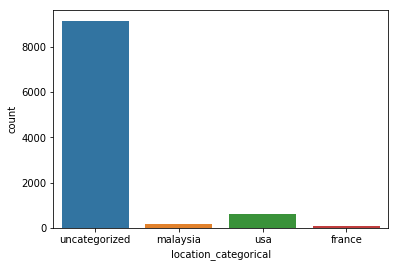

In [72]:
sns.countplot(x='location_categorical', data=test_df)

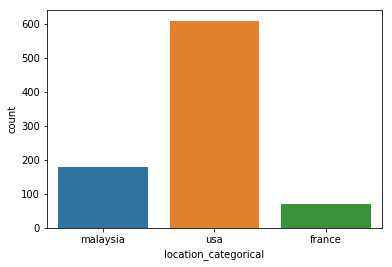

In [73]:
sns.countplot(x='location_categorical', data=test_df[test_df['location_categorical']!= 'uncategorized'])

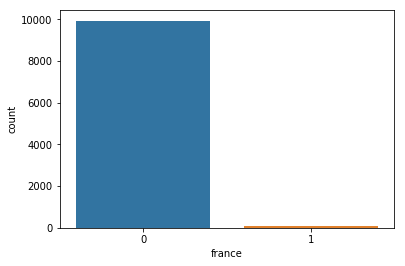

In [74]:
sns.countplot(x='france', data=test_df)

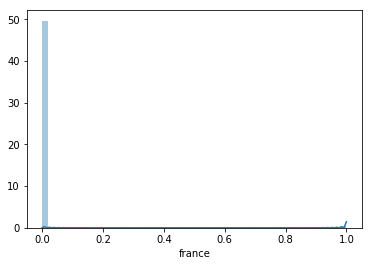

In [75]:
sns.distplot(test_df['france'])

In [76]:
test_df['from_user_followercount'].value_counts()

0        47
5        43
17       40
14       40
6        38
15       36
18       33
13       32
10       32
11       31
56       31
3        30
20       30
28       29
25       29
88       29
26       29
50       28
24       28
16       28
9        28
12       28
33       28
7        28
41       28
32       27
21       27
85       27
22       26
54       26
         ..
5214      1
1124      1
3173      1
1140      1
3189      1
23671     1
1081      1
5262      1
15507     1
3237      1
1196      1
5294      1
1220      1
1228      1
1348      1
3285      1
21718     1
3293      1
44257     1
1268      1
32011     1
3341      1
7439      1
27921     1
1300      1
54566     1
1332      1
3381      1
19773     1
4090      1
Name: from_user_followercount, Length: 3058, dtype: int64

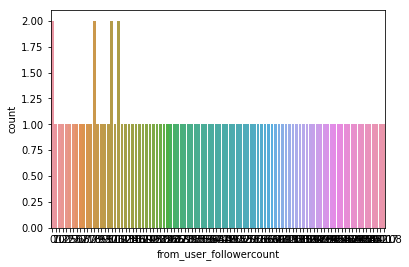

In [77]:
sns.countplot(x='from_user_followercount', data=test_df[:100])

In [78]:
test_df['from_user_followercount'].describe()

count    1.000000e+04
mean     3.908142e+03
std      4.532799e+04
min      0.000000e+00
25%      1.150000e+02
50%      3.670000e+02
75%      1.151250e+03
max      2.365443e+06
Name: from_user_followercount, dtype: float64

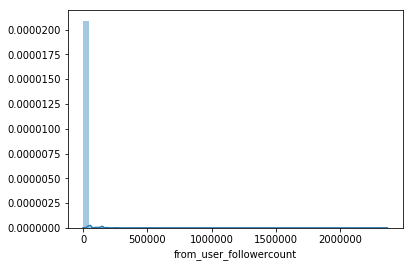

In [79]:
sns.distplot(test_df['from_user_followercount'])

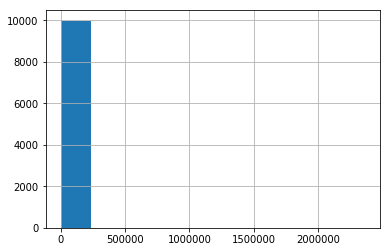

In [80]:
test_df['from_user_followercount'].hist()

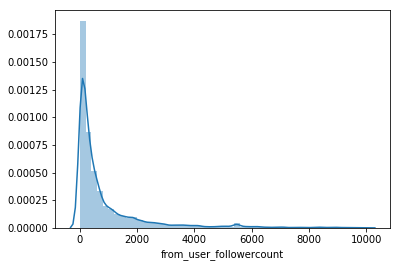

In [81]:
sns.distplot(test_df[test_df['from_user_followercount'] < 10000]['from_user_followercount'])

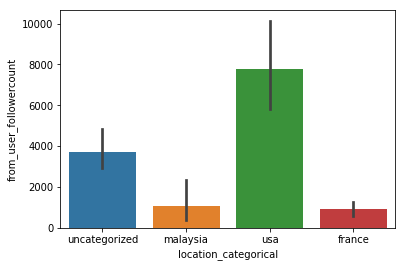

In [82]:
sns.barplot(x='location_categorical', y='from_user_followercount', data=test_df)

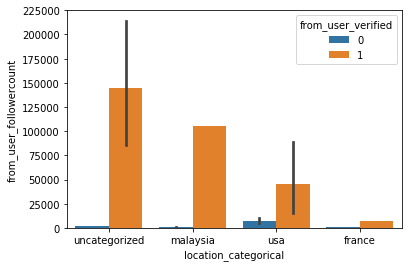

In [83]:
sns.barplot(x='location_categorical', hue='from_user_verified', y='from_user_followercount', data=test_df)

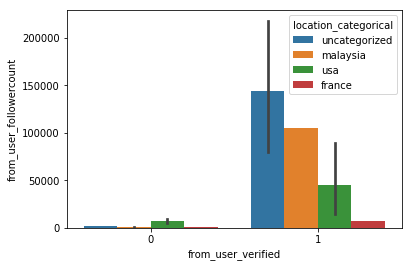

In [84]:
sns.barplot(x='from_user_verified', hue='location_categorical', y='from_user_followercount', data=test_df)

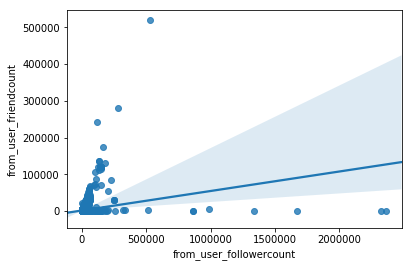

In [85]:
sns.regplot(x='from_user_followercount', y='from_user_friendcount', data=test_df)

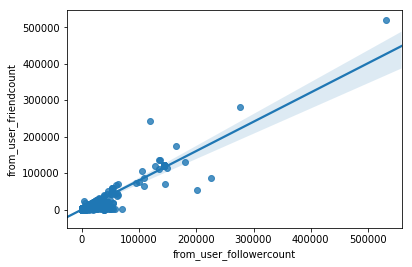

In [86]:
sns.regplot(x='from_user_followercount', y='from_user_friendcount', data=test_df[test_df['from_user_verified']==0])

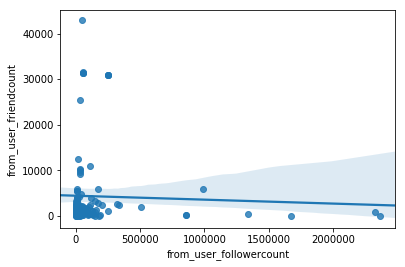

In [87]:
sns.regplot(x='from_user_followercount', y='from_user_friendcount', data=test_df[test_df['from_user_verified']==1])

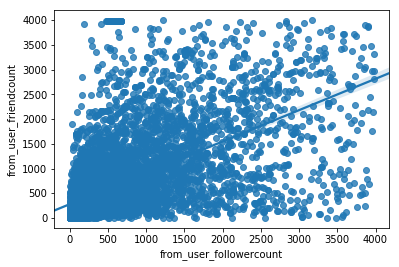

In [88]:
sns.regplot(x='from_user_followercount', y='from_user_friendcount', data=test_df[(test_df['from_user_followercount']<4000)&(test_df['from_user_friendcount']<4000)])

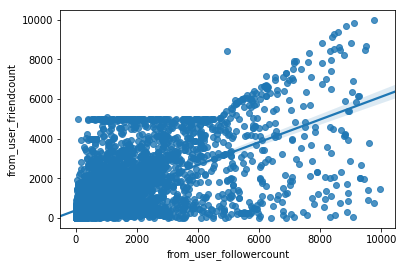

In [89]:
sns.regplot(x='from_user_followercount', y='from_user_friendcount', data=test_df[(test_df['from_user_followercount']<10000)&(test_df['from_user_friendcount']<10000)])

## Plotting time series data

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
sns.__version__

'0.9.0'

conda install seaborn

In [180]:
tweets.dtypes

id                                     object
created_at                     datetime64[ns]
from_user_name                         object
from_user_id                            int64
from_user_lang                         object
from_user_tweetcount                    int64
from_user_followercount                 int64
from_user_friendcount                   int64
from_user_listed                        int64
from_user_realname                     object
from_user_utcoffset                    object
from_user_timezone                     object
from_user_description                  object
from_user_url                          object
from_user_verified                      int64
from_user_profile_image_url            object
from_user_created_at           datetime64[ns]
from_user_withheld_scope               object
from_user_favourites_count              int64
source                                 object
location                               object
geo_lat                           

In [181]:
tweets.head()

,id,created_at,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,...,possibly_sensitive,quoted_status_id,withheld_copyright,withheld_scope,location_nomissing,france,usa,ny,malaysia,date
0,1039462605264498689,2018-09-11 10:36:12,vgbio123,1000842576549773312,fr,969,29,91,0,VGBIO,...,0.0,NaN,None,None,not provided,0,0,0,0,2018-09-11
1,1039462678199189504,2018-09-11 10:36:29,KelseyABCTeach,1037277619543306241,en,1,2,12,0,Kelsey Munro - ABC Teachers,...,NaN,NaN,None,None,"Lichfield, England",0,0,0,0,2018-09-11
2,1039462759505829888,2018-09-11 10:36:48,Dagim_Gemechu,4855390810,en,1621,101,204,1,Dagim,...,NaN,NaN,None,None,"Centreville, VA",0,0,0,0,2018-09-11
3,1039462859980374016,2018-09-11 10:37:12,MonseurM,477202320,fr,22190,274,942,3,Monseur Myriam,...,0.0,NaN,None,None,"Esneux, Belgique",0,0,0,0,2018-09-11
4,1039462899050274816,2018-09-11 10:37:22,StephenGuerraMN,19753525,en,22122,599,952,53,Stephen Guerra,...,0.0,NaN,None,None,rochester mn,0,0,0,0,2018-09-11


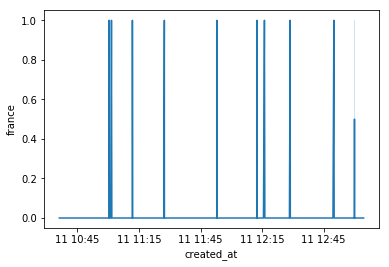

In [182]:
sns.lineplot(x="created_at", y="france", data=tweets[:1000])

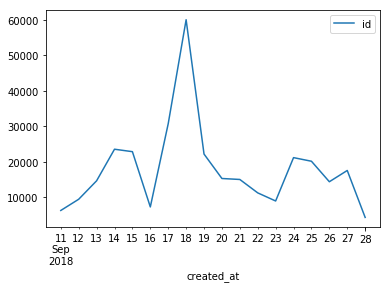

In [189]:
tweets.set_index('created_at').groupby([pd.Grouper(freq='D')])[['id']].count().plot()

In [192]:
daily = tweets.set_index('created_at').groupby([pd.Grouper(freq='D')])[['france', 'usa', 'malaysia']].sum()

In [193]:
daily.head()

,france,usa,malaysia
created_at,,,
2018-09-11,39,344,1
2018-09-12,36,555,8
2018-09-13,86,787,27
2018-09-14,128,962,71
2018-09-15,91,580,118


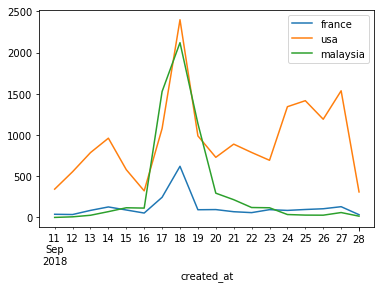

In [194]:
daily.plot()

With a categorical variable (counts)

In [195]:
test_df

,id,created_at,from_user_name,from_user_id,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_listed,from_user_realname,...,quoted_status_id,withheld_copyright,withheld_scope,location_nomissing,france,usa,ny,malaysia,location_categorical,date
304194,1045114476624670721,2018-09-27 00:54:43,SkylerDim,807819517430632448,en,399,76,235,0,Frances Dela Pieza,...,NaN,None,None,not provided,0,0,0,0,uncategorized,2018-09-27
314500,1045367426165043201,2018-09-27 17:39:51,emilyjeanroche,74272493,en,3806,522,246,30,Emily Jean Roche △⃒⃘,...,NaN,None,None,"Berea, KY",0,0,0,0,uncategorized,2018-09-27
196458,1042543406235435008,2018-09-19 22:38:12,ESC19Behavior,2658649764,en,2994,656,576,35,ESC19 Behavior Proj,...,1.038526e+18,None,None,Project Manager: Albert Villa - avilla@esc19.net,0,0,0,0,uncategorized,2018-09-19
44536,1040655117303918593,2018-09-14 17:34:49,181338dddaeng,888303491315372032,en-gb,18760,95,145,0,Answer1onBB200,...,NaN,None,None,not provided,0,0,0,0,uncategorized,2018-09-14
74153,1041014158081310720,2018-09-15 17:21:31,smileseokjinie,1015076936941555712,es,3216,72,259,0,LUCIAVK💜,...,1.040516e+18,None,None,not provided,0,0,0,0,uncategorized,2018-09-15
76890,1041110991117856768,2018-09-15 23:46:17,hyoriaaa,283284879,id,18727,419,909,2,so show me 💜,...,NaN,None,None,not provided,0,0,0,0,uncategorized,2018-09-15
185599,1042364719850352645,2018-09-19 10:48:10,faarzanaaa,739835299736354818,en,4240,195,123,0,na,...,1.041279e+18,None,None,doctor,0,0,0,0,uncategorized,2018-09-19
283204,1044649384632373250,2018-09-25 18:06:36,npaa_uk,3430115463,en-gb,4386,6924,1264,91,Police Autism UK,...,NaN,None,None,United Kingdom,0,0,0,0,uncategorized,2018-09-25
171669,1042159148543238144,2018-09-18 21:11:18,todneke,2256845941,pt,3421,97,170,0,Jefferson Stellflex,...,NaN,None,None,nem ai pra você,0,0,0,0,uncategorized,2018-09-18
106400,1041791615067717632,2018-09-17 20:50:51,TheMainstand,133243776,en,268244,1324,1834,138,.,...,NaN,None,None,not provided,0,0,0,0,uncategorized,2018-09-17


In [196]:
test_df['location_categorical'].value_counts()

uncategorized    9141
usa               610
malaysia          180
france             69
Name: location_categorical, dtype: int64

In [197]:
test_df['date'] = test_df['created_at'].dt.date

In [198]:
test_df['date'].value_counts()

2018-09-18    1789
2018-09-17     933
2018-09-14     759
2018-09-15     703
2018-09-19     656
2018-09-24     653
2018-09-25     640
2018-09-27     551
2018-09-21     483
2018-09-13     473
2018-09-20     472
2018-09-26     450
2018-09-22     361
2018-09-12     278
2018-09-23     265
2018-09-16     228
2018-09-11     164
2018-09-28     142
Name: date, dtype: int64

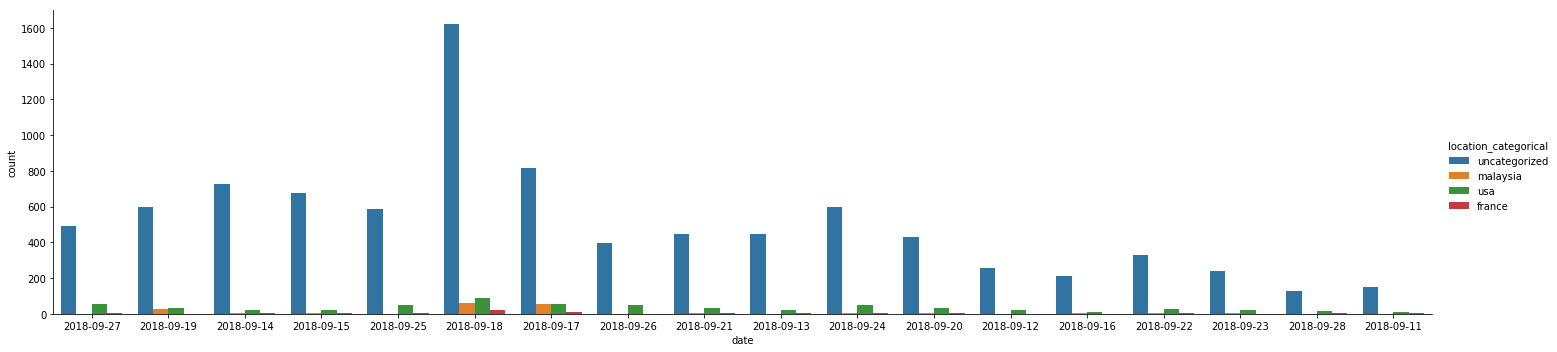

In [199]:
sns.catplot("date", data=test_df[['date', 'location_categorical']], 
               hue='location_categorical', aspect=4.0, kind='count')

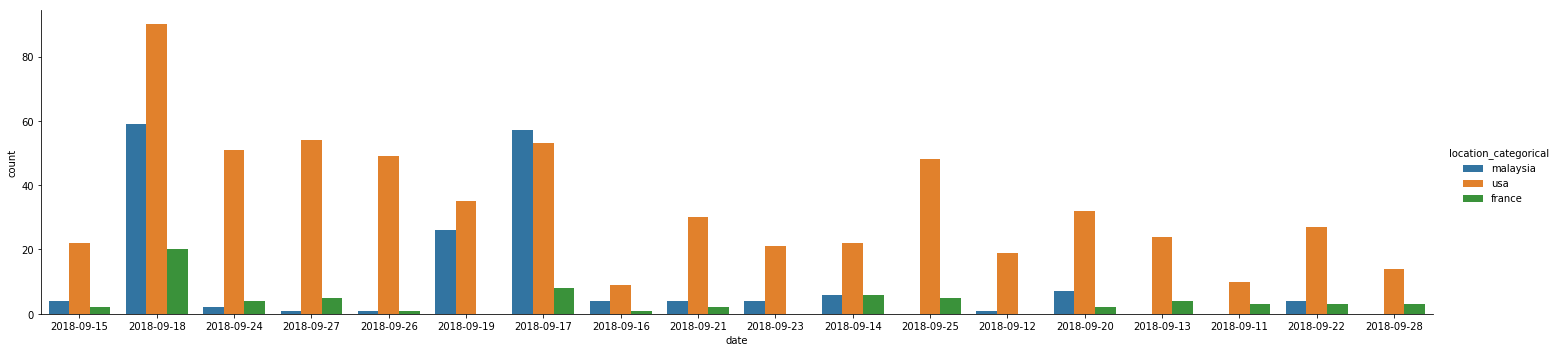

In [200]:
sns.catplot("date", data=test_df[test_df['location_categorical']!='uncategorized'][['date', 'location_categorical']], 
               hue='location_categorical', aspect=4.0, kind='count')

Two or more numerical variables

In [201]:
data = test_df.groupby('date')[['from_user_followercount', 'from_user_friendcount']].mean()

In [202]:
data

,from_user_followercount,from_user_friendcount
date,,
2018-09-11,4598.957317,3873.554878
2018-09-12,8068.284173,2939.845324
2018-09-13,3833.437632,1955.456660
2018-09-14,2586.901186,1763.640316
2018-09-15,1703.072546,1463.728307
2018-09-16,1748.982456,1324.359649
2018-09-17,6174.877814,1718.333333
2018-09-18,1150.621576,791.083287
2018-09-19,5342.829268,1475.794207


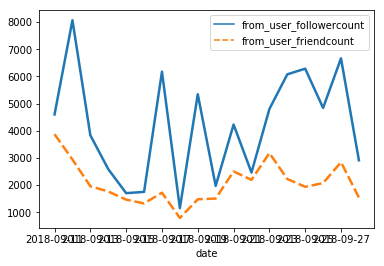

In [203]:
sns.lineplot(data=data,palette="tab10", linewidth=2.5,  )

(array([736948., 736950., 736952., 736954., 736956., 736958., 736960.,
        736962., 736964.]), <a list of 9 Text xticklabel objects>)

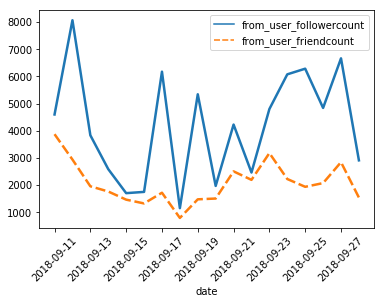

In [204]:
g = sns.lineplot(data=data,palette="tab10", linewidth=2.5,  )
plt.xticks(rotation=45)